In [1]:
#this becomes the master copy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/weather_data_output.csv"

# Range of latitudes and longitudes 
lat_range = (-90, 90)
lng_range = (-180, 180)


In [3]:
#Create the  basic dataframe and the variables
#the City column will later be populated based on looking up the lat/lng
#the CityClean column will later be populated based on the City column


weather= pd.DataFrame(columns =['Lat',"Lng","City","CityClean"])
lat = []
lng = []
for x in range(0,2500):  ####increase this again to 2500 to get the full data set
    lat.append(random.uniform(-90, 90))
    lng.append(random.uniform(-180, 180))
weather['Lat']=lat
weather['Lng']=lng
weather.head(10)

,Lat,Lng,City,CityClean
0,87.062663,158.303756,NaN,NaN
1,-14.396816,-113.917616,NaN,NaN
2,30.055836,105.325133,NaN,NaN
3,-37.559020,-46.400365,NaN,NaN
4,-64.658621,151.796281,NaN,NaN
5,66.047944,108.543801,NaN,NaN
6,-38.943687,31.497819,NaN,NaN
7,70.057334,25.602623,NaN,NaN
8,25.307864,-93.567218,NaN,NaN
9,-25.139872,174.535019,NaN,NaN


In [4]:
#find the city names from citipy using the lat and lng

cities =[]
for index, row in weather.iterrows():
    city=citipy.nearest_city(row["Lat"],row["Lng"])
    cities.append(city.city_name)
weather['City']=cities
weather['CityClean']=cities
weather.head(10)

,Lat,Lng,City,CityClean
0,87.062663,158.303756,cherskiy,cherskiy
1,-14.396816,-113.917616,rikitea,rikitea
2,30.055836,105.325133,anju,anju
3,-37.559020,-46.400365,rio grande,rio grande
4,-64.658621,151.796281,hobart,hobart
5,66.047944,108.543801,aykhal,aykhal
6,-38.943687,31.497819,east london,east london
7,70.057334,25.602623,karasjok,karasjok
8,25.307864,-93.567218,brownsville,brownsville
9,-25.139872,174.535019,vao,vao


In [5]:
#drop any duplicates

cleaned_weather = weather.drop_duplicates("City",keep="first")
cleaned_weather = pd.DataFrame(cleaned_weather)
len(cleaned_weather)

861

In [6]:
#clean up the spaces in cities that have them
#otherwise, the URLs break

#https://stackoverflow.com/questions/27556134/convert-spaces-to-20-in-list


cleaned_weather['CityClean'] = cleaned_weather['CityClean'].str.replace(' ', '%20')

cleaned_weather.head(20)

,Lat,Lng,City,CityClean
0,87.062663,158.303756,cherskiy,cherskiy
1,-14.396816,-113.917616,rikitea,rikitea
2,30.055836,105.325133,anju,anju
3,-37.559020,-46.400365,rio grande,rio%20grande
4,-64.658621,151.796281,hobart,hobart
5,66.047944,108.543801,aykhal,aykhal
6,-38.943687,31.497819,east london,east%20london
7,70.057334,25.602623,karasjok,karasjok
8,25.307864,-93.567218,brownsville,brownsville
9,-25.139872,174.535019,vao,vao


In [7]:
#create the variables to hold the incoming data
temp = []
humidity =[]
clouds = []
wind = []

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cleaned_weather.iterrows():
    target_city = row["CityClean"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("No city info found. Skipping this city.")

    else:
        cleaned_weather.set_value(index, "City", city_data["name"])
        cleaned_weather.set_value(index, "Country",city_data["sys"]["country"])
        cleaned_weather.set_value(index, "Temperature", city_data["main"]["temp"])
        cleaned_weather.set_value(index, "Latitude", city_data["coord"]["lat"])
        cleaned_weather.set_value(index, "Longitude", city_data["coord"]["lon"])
        cleaned_weather.set_value(index, "Percent Humidity", city_data["main"]["humidity"])
        cleaned_weather.set_value(index, "Percent Cloudiness", city_data["clouds"]["all"])
        cleaned_weather.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        time.sleep(.300) #wait 300 milliseconds before going to the next one
        
        print("**********************************************")
        print("Now Processing: City # " , row_count, ' : ' , city_data["name"], ' , ' , city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval


C:\Users\patti\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\patti\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\patti\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\patti\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\patti\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\patti\Anaconda3\lib\s

**********************************************
Now Processing: City #  1  :  Cherskiy  ,  RU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=cherskiy
**********************************************
Now Processing: City #  2  :  Rikitea  ,  PF
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=rikitea
**********************************************
Now Processing: City #  3  :  Anju  ,  KP
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=anju
**********************************************
Now Processing: City #  4  :  Rio Grande  ,  BR
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=rio%20grande
**********************************************
Now Processing: City #  5  :  Hobart  ,  AU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=I

**********************************************
Now Processing: City #  40  :  Provideniya  ,  RU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=provideniya
**********************************************
Now Processing: City #  41  :  Port Lincoln  ,  AU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=port%20lincoln
**********************************************
Now Processing: City #  42  :  Castro  ,  CL
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=castro
**********************************************
Now Processing: City #  43  :  Te Anau  ,  NZ
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=te%20anau
**********************************************
Now Processing: City #  44  :  Aklavik  ,  CA
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca0338562

**********************************************
Now Processing: City #  79  :  Avera  ,  US
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=avera
**********************************************
Now Processing: City #  80  :  Taltal  ,  CL
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=taltal
**********************************************
Now Processing: City #  81  :  Nikolskoye  ,  RU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=nikolskoye
No city info found. Skipping this city.
**********************************************
Now Processing: City #  82  :  Rajapalaiyam  ,  IN
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=rajapalaiyam
**********************************************
Now Processing: City #  83  :  Suifenhe  ,  CN
http://api.openweathermap.org/data/2.5/w

**********************************************
Now Processing: City #  118  :  Ilulissat  ,  GL
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=ilulissat
**********************************************
Now Processing: City #  119  :  Murwara  ,  IN
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=murwara
No city info found. Skipping this city.
**********************************************
Now Processing: City #  120  :  Cumanayagua  ,  CU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=cumanayagua
**********************************************
Now Processing: City #  121  :  Thompson  ,  CA
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=thompson
**********************************************
Now Processing: City #  122  :  Saint-Joseph  ,  FR
http://api.openweathermap.o

**********************************************
Now Processing: City #  157  :  Miri  ,  NG
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=miri
**********************************************
Now Processing: City #  158  :  Muros  ,  ES
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=muros
**********************************************
Now Processing: City #  159  :  Pemberton  ,  AU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=pemberton
**********************************************
Now Processing: City #  160  :  Chuy  ,  UY
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=chuy
**********************************************
Now Processing: City #  161  :  Tiarei  ,  PF
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIA

**********************************************
Now Processing: City #  196  :  Kapit  ,  MY
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=kapit
**********************************************
Now Processing: City #  197  :  Dunda  ,  IN
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=dunda
**********************************************
Now Processing: City #  198  :  Elko  ,  US
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=elko
**********************************************
Now Processing: City #  199  :  San Angelo  ,  US
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=san%20angelo
**********************************************
Now Processing: City #  200  :  Esperance  ,  TT
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&unit

**********************************************
Now Processing: City #  235  :  Puerto El Triunfo  ,  SV
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=puerto%20el%20triunfo
**********************************************
Now Processing: City #  236  :  Comodoro Rivadavia  ,  AR
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=comodoro%20rivadavia
**********************************************
Now Processing: City #  237  :  Puerto Palomas  ,  US
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=puerto%20palomas
**********************************************
Now Processing: City #  238  :  Ayna  ,  ES
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=ayna
**********************************************
Now Processing: City #  239  :  Bathsheba  ,  BB
http://api.openweathermap.

**********************************************
Now Processing: City #  274  :  Melfi  ,  IT
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=melfi
**********************************************
Now Processing: City #  275  :  Talnakh  ,  RU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=talnakh
**********************************************
Now Processing: City #  276  :  Zhoucheng  ,  CN
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=zhoucheng
**********************************************
Now Processing: City #  277  :  Laguna  ,  MX
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=laguna
**********************************************
Now Processing: City #  278  :  Flinders  ,  AU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&u

**********************************************
Now Processing: City #  313  :  Fremont  ,  US
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=fremont
**********************************************
Now Processing: City #  314  :  Kurilsk  ,  RU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=kurilsk
**********************************************
Now Processing: City #  315  :  Gillette  ,  US
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=gillette
**********************************************
Now Processing: City #  316  :  Meadow Lake  ,  CA
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=meadow%20lake
**********************************************
Now Processing: City #  317  :  Masvingo  ,  ZW
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca033856265

**********************************************
Now Processing: City #  352  :  Anloga  ,  GH
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=anloga
**********************************************
Now Processing: City #  353  :  Urusha  ,  RU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=urusha
**********************************************
Now Processing: City #  354  :  Sitka  ,  US
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=sitka
No city info found. Skipping this city.
**********************************************
Now Processing: City #  355  :  Burnie  ,  AU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=burnie
**********************************************
Now Processing: City #  356  :  Oneida  ,  US
http://api.openweathermap.org/data/2.5/weather?appid=2f0c

**********************************************
Now Processing: City #  392  :  Samarai  ,  PG
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=samarai
**********************************************
Now Processing: City #  393  :  New Glasgow  ,  CA
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=new%20glasgow
**********************************************
Now Processing: City #  394  :  Imbituba  ,  BR
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=imbituba
**********************************************
Now Processing: City #  395  :  Anzio  ,  IT
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=anzio
No city info found. Skipping this city.
**********************************************
Now Processing: City #  396  :  Christchurch  ,  NZ
http://api.openweathermap.org/dat

**********************************************
Now Processing: City #  431  :  Bom Jesus  ,  BR
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=bom%20jesus
**********************************************
Now Processing: City #  432  :  Mimoso do Sul  ,  BR
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=mimoso%20do%20sul
No city info found. Skipping this city.
**********************************************
Now Processing: City #  433  :  Yatou  ,  CM
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=yatou
**********************************************
Now Processing: City #  434  :  Walvis Bay  ,  NA
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=walvis%20bay
**********************************************
Now Processing: City #  435  :  Cidreira  ,  BR
http://api.openweat

**********************************************
Now Processing: City #  470  :  Teahupoo  ,  PF
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=teahupoo
**********************************************
Now Processing: City #  471  :  Saint-Georges  ,  CA
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=saint-georges
**********************************************
Now Processing: City #  472  :  Richards Bay  ,  ZA
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=richards%20bay
**********************************************
Now Processing: City #  473  :  Antipovka  ,  RU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=antipovka
**********************************************
Now Processing: City #  474  :  Narsaq  ,  GL
http://api.openweathermap.org/data/2.5/weather?appid=2f0c

**********************************************
Now Processing: City #  509  :  Entebbe  ,  UG
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=entebbe
**********************************************
Now Processing: City #  510  :  Mariental  ,  DE
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=mariental
**********************************************
Now Processing: City #  511  :  Ostersund  ,  SE
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=ostersund
**********************************************
Now Processing: City #  512  :  Iglesias  ,  ES
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=iglesias
**********************************************
Now Processing: City #  513  :  Le Port  ,  FR
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522e

**********************************************
Now Processing: City #  548  :  Bingerville  ,  CI
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=bingerville
**********************************************
Now Processing: City #  549  :  Lusambo  ,  CD
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=lusambo
**********************************************
Now Processing: City #  550  :  Mount Pleasant  ,  US
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=mount%20pleasant
**********************************************
Now Processing: City #  551  :  Moncton  ,  CA
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=moncton
**********************************************
Now Processing: City #  552  :  Oktyabrskoye  ,  RU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c

**********************************************
Now Processing: City #  588  :  Wundanyi  ,  KE
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=wundanyi
**********************************************
Now Processing: City #  589  :  The Valley  ,  AI
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=the%20valley
**********************************************
Now Processing: City #  590  :  Shiraz  ,  IR
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=shiraz
**********************************************
Now Processing: City #  591  :  Wuzhou  ,  CN
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=wuzhou
**********************************************
Now Processing: City #  592  :  Rabo de Peixe  ,  PT
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca0338562652

**********************************************
Now Processing: City #  627  :  Menongue  ,  AO
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=menongue
**********************************************
Now Processing: City #  628  :  Maningrida  ,  AU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=maningrida
**********************************************
Now Processing: City #  629  :  Port-Gentil  ,  GA
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=port-gentil
**********************************************
Now Processing: City #  630  :  Leh  ,  IN
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=leh
**********************************************
Now Processing: City #  631  :  Kalmunai  ,  LK
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec

**********************************************
Now Processing: City #  667  :  Oranjestad  ,  AW
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=oranjestad
**********************************************
Now Processing: City #  668  :  Mangrol  ,  IN
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=mangrol
**********************************************
Now Processing: City #  669  :  Basco  ,  US
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=basco
**********************************************
Now Processing: City #  670  :  Prieska  ,  ZA
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=prieska
**********************************************
Now Processing: City #  671  :  Dunedin  ,  NZ
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3d

**********************************************
Now Processing: City #  706  :  Tucupita  ,  VE
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=tucupita
**********************************************
Now Processing: City #  707  :  Wronki  ,  PL
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=wronki
**********************************************
Now Processing: City #  708  :  Linxia  ,  CN
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=linxia
**********************************************
Now Processing: City #  709  :  Murgab  ,  TM
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=murgab
**********************************************
Now Processing: City #  710  :  Usogorsk  ,  RU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&uni

**********************************************
Now Processing: City #  745  :  Tamandare  ,  BR
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=tamandare
**********************************************
Now Processing: City #  746  :  Vilyuysk  ,  RU
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=vilyuysk
**********************************************
Now Processing: City #  747  :  Grootfontein  ,  NA
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=grootfontein
**********************************************
Now Processing: City #  748  :  Maniitsoq  ,  GL
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=maniitsoq
**********************************************
Now Processing: City #  749  :  Mackay  ,  CA
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca033

**********************************************
Now Processing: City #  785  :  Tuensang  ,  IN
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=tuensang
**********************************************
Now Processing: City #  786  :  Nieuw Amsterdam  ,  SR
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=nieuw%20amsterdam
**********************************************
Now Processing: City #  787  :  Damietta  ,  EG
http://api.openweathermap.org/data/2.5/weather?appid=2f0c4285fca03385626522ec3570b3dc&units=IMPERIAL&q=damietta


In [8]:
cleaned_weather.head(10)

,Lat,Lng,City,CityClean,Country,Temperature,Latitude,Longitude,Percent Humidity,Percent Cloudiness,Wind Speed (mph)
0,87.062663,158.303756,Cherskiy,cherskiy,RU,-5.18,68.75,161.30,94.0,0.0,6.31
1,-14.396816,-113.917616,Rikitea,rikitea,PF,78.53,-23.12,-134.97,76.0,11.0,9.26
2,30.055836,105.325133,Anju,anju,KP,49.55,39.62,125.66,47.0,73.0,2.06
3,-37.559020,-46.400365,Rio Grande,rio%20grande,BR,78.80,-32.03,-52.10,47.0,20.0,6.93
4,-64.658621,151.796281,Hobart,hobart,AU,42.67,-42.88,147.33,93.0,0.0,5.82
5,66.047944,108.543801,Aykhal,aykhal,RU,19.40,65.95,111.51,44.0,0.0,8.95
6,-38.943687,31.497819,East London,east%20london,ZA,71.60,-33.02,27.91,88.0,0.0,6.93
7,70.057334,25.602623,Karasjok,karasjok,NO,41.00,69.47,25.52,90.0,75.0,18.34
8,25.307864,-93.567218,Brownsville,brownsville,US,81.91,25.91,-97.49,23.0,40.0,5.82
9,-25.139872,174.535019,Vao,vao,EE,47.03,59.10,26.19,57.0,75.0,5.86


In [9]:
#drop the NaN's
#write the dataframe to a csv file

cleaned_weather.dropna()
cleaned_weather.to_csv('output/weather_data_output.csv')


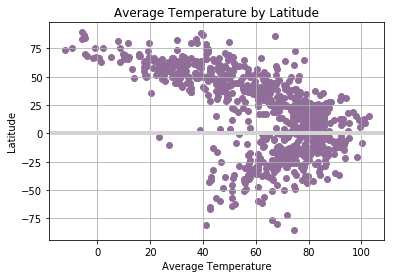

In [10]:
#Plot out the temperature vs the latitude

plt.scatter(x=cleaned_weather['Temperature'], y=cleaned_weather['Lat'], marker="o", color = ['xkcd:faded purple'])
plt.xlabel("Average Temperature")
plt.ylabel("Latitude")
plt.axhline(y=0,  linewidth=4, color = 'lightgrey')


plt.title("Average Temperature by Latitude")
plt.grid(True)
plt.savefig("output/Temperature Relationship to Latitude.png")


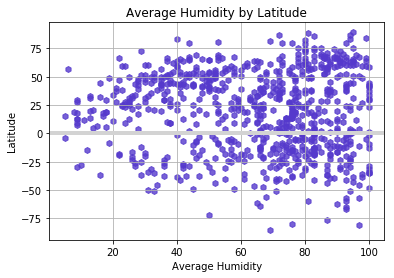

In [11]:
#Plot out the Humidity vs the latitude

plt.scatter(x=cleaned_weather['Percent Humidity'], y=cleaned_weather['Lat'], marker="h", color = ['xkcd:blurple'], alpha = 0.80)
plt.xlabel("Average Humidity")
plt.ylabel("Latitude")
plt.axhline(y=0,  linewidth=4, color = 'lightgrey')

plt.title("Average Humidity by Latitude")
plt.grid(True)
plt.savefig("output/Humidity Relationship to Latitude.png")


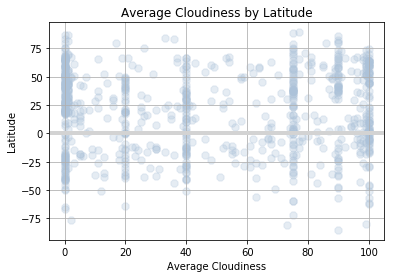

In [12]:
#Plot out the Clouds vs the latitude

plt.scatter(x=cleaned_weather['Percent Cloudiness'], y=cleaned_weather['Lat'], marker="8", color = ['xkcd:cloudy blue'],alpha = 0.30, s= 60)
plt.xlabel("Average Cloudiness")
plt.ylabel("Latitude")
plt.axhline(y=0,  linewidth=4, color = 'lightgrey')


plt.title("Average Cloudiness by Latitude")
plt.grid(True)
plt.savefig("output/Cloudiness Relationship to Latitude.png")


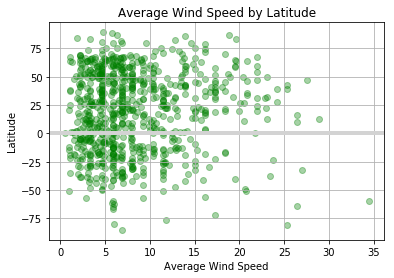

In [13]:
#Plot out the Wind vs the latitude

plt.scatter(x=cleaned_weather['Wind Speed (mph)'], y=cleaned_weather['Lat'], marker="o", color = ['green'], alpha = 0.35)
plt.xlabel("Average Wind Speed")
plt.ylabel("Latitude")
plt.axhline(y=0,  linewidth=4, color = 'lightgrey')

plt.title("Average Wind Speed by Latitude")
plt.grid(True)
plt.savefig("output/Wind Speed Relationship to Latitude.png")
